In [21]:
import cv2, os

IM_WIDTH = IM_HEIGHT = 198

def image_processor(img_path): 

    # SOURCE: https://www.geeksforgeeks.org/cropping-faces-from-images-using-opencv-python/
    face_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_alt2.xml')

    # Read image passed in.
    img_cv = cv2.imread(img_path)
    # plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    # plt.title('Unprocessed Image')
    # plt.show()
    
    
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)    
    # plt.imshow(gray)
    # plt.title('grayscale Image')
    # plt.show()
    
    # use opencv cascade classifier for face recognition
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) <= 0: #idk why im making it less than, not like it will detect negative faces or somthing
        raise ValueError("Error! No faces detected in the image.")

    # Draw rectangle around the faces and store the cropped face.
    # Update: Now handles MORE THAN ONE FACE!!!! 
    cropped_faces_list = []
    for (x, y, w, h) in faces: 
        cv2.rectangle(img_cv, (x, y), (x+w, y+h), (0, 0, 255), 2) 
        faces = img_cv[y:y + h, x:x + w]
        cropped_faces_list.append(faces)
    
    # plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    # plt.title(' Scanned Image ')
    # plt.show()
      
    # Take each face in the list, resize it.
    cropped_faces_list = [cv2.resize(face, (IM_WIDTH, IM_HEIGHT)) for face in cropped_faces_list]
    
    # for item in cropped_faces_list:
    #     item = cv2.resize(item, (IM_WIDTH, IM_HEIGHT))
    
    #All this does is print every face out in RGB. Redundant because of second function
    # for cropped_photo in cropped_faces_list:
    #     #This was flipping impossible to solve at first. dyk how much time it took me to find out their RGB channels are bloody reversed??!!!!???
    #     RGB_cropped_img_cv = cv2.cvtColor(cropped_photo, cv2.COLOR_BGR2RGB)
    #     plt.imshow(RGB_cropped_img_cv)
    #     plt.title(' RGB Processed Image ')
    #     plt.show()
    
    return cropped_faces_list 


In [33]:
DATA_DIR = ".\personal_images"
DATA_DESTINATION = ".\personal_images\cropped_photos_round_3"
failed_photos = []

## Creating face extractor for personal photos dataset.
def face_cropper(folder_path, destination_folder): 
         
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
            
        ##convert every '\' to '/':
        #had to create a "\" string because \ is a string literal with unique properties. 
        backslash = "\ "
        backslash = backslash.replace(" ", "")
        # print(f"backslash: ------{backslash}--------") #checking to see if whitespace was removed
        
        # Check if the file is an image (png or jpg)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            
            filepath = filepath.replace(backslash,"/")
        
            print(f"filepath => {filepath}")
            try:
                # Load the image
                image = cv2.imread(filepath)
                if image is None:
                    print(f"Error loading image: {filename}")
                    continue
                
                # Process the image to extract faces
                faces_list = image_processor(filepath)
                
                # Save each face to the destination folder
                for i, face in enumerate(faces_list):
                    face_filename = f"{os.path.splitext(filename)[0]}_{i}.jpg"
                    face_filepath = os.path.join(destination_folder, face_filename)
                    cv2.imwrite(face_filepath, face)
            except Exception as e:
                print(f"Error processing image {filename}: {e}")
                failed_photos.append(image)
                
            

face_cropper(DATA_DIR, DATA_DESTINATION) #Already done.

filepath => ./personal_images/alexia potrait.jpg
filepath => ./personal_images/alexia_hair_back.jpg
filepath => ./personal_images/alexia_smile.jpg
filepath => ./personal_images/alexia_smirk.jpg
filepath => ./personal_images/baby_janine.jpg
filepath => ./personal_images/IMG-20240409-WA0008.jpg
filepath => ./personal_images/IMG-20240409-WA0009.jpg
filepath => ./personal_images/IMG-20240409-WA0010.jpg
Error processing image IMG-20240409-WA0010.jpg: Error! No faces detected in the image.
filepath => ./personal_images/IMG-20240409-WA0011.jpg
filepath => ./personal_images/IMG-20240409-WA0012.jpg
filepath => ./personal_images/IMG-20240409-WA0013.jpg
Error processing image IMG-20240409-WA0013.jpg: Error! No faces detected in the image.
filepath => ./personal_images/IMG-20240409-WA0014.jpg
filepath => ./personal_images/IMG-20240409-WA0015.jpg
filepath => ./personal_images/IMG-20240409-WA0016.jpg
filepath => ./personal_images/IMG-20240409-WA0017.jpg
filepath => ./personal_images/IMG-20240409-WA0

Total number of failed images, 28


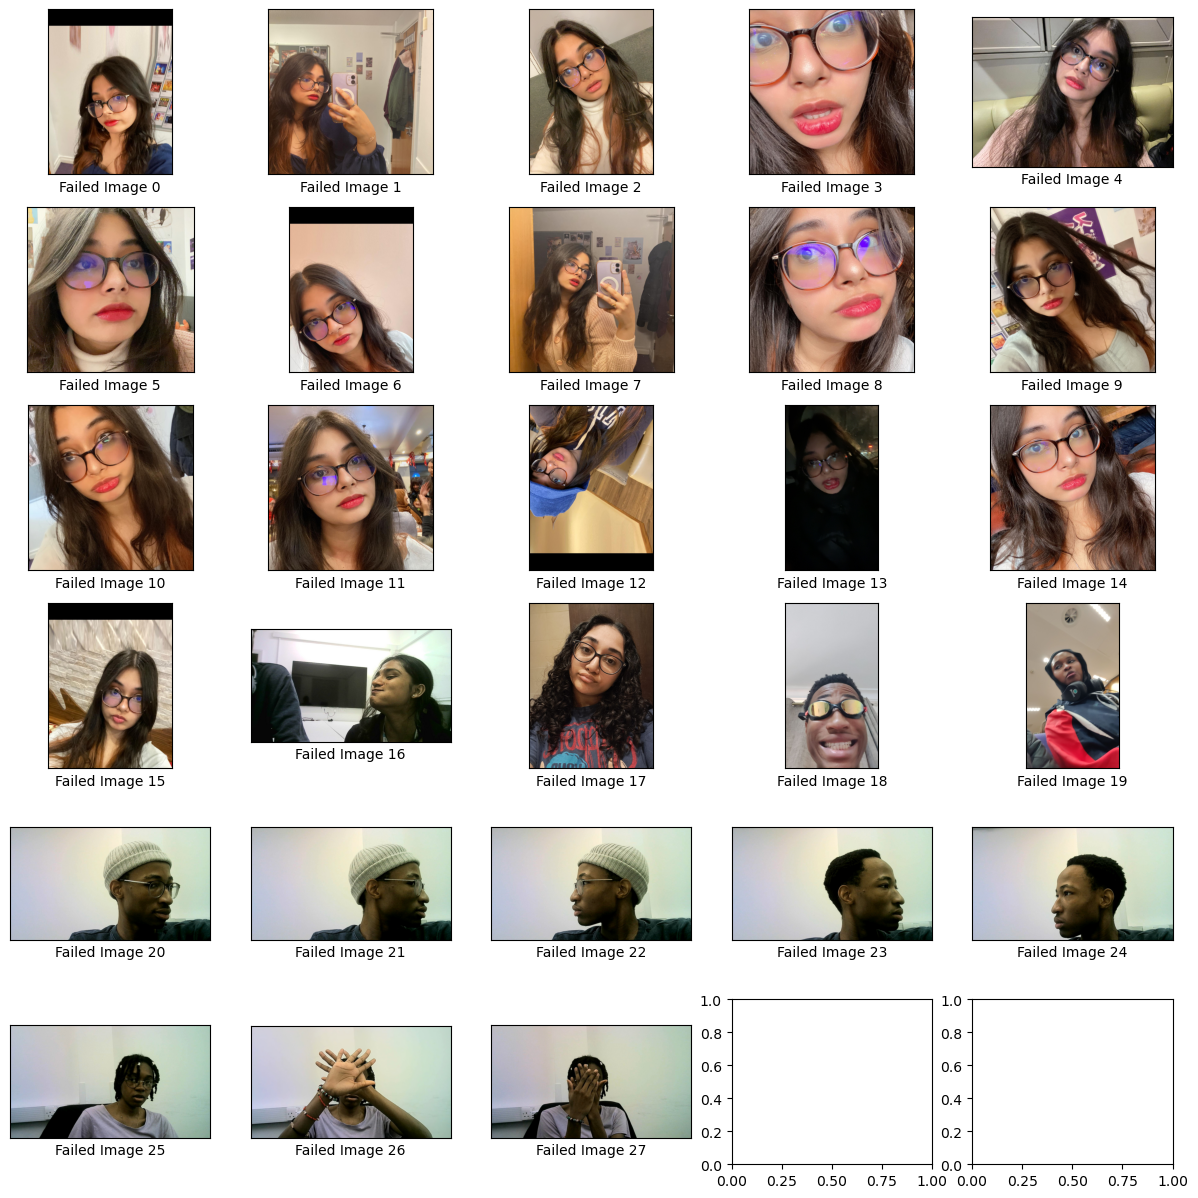

In [38]:
import matplotlib.pyplot as plt 
import math

n = len(failed_photos)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

for i, image in enumerate(failed_photos):
    ax = axes.flat[i]
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_xlabel(f'Failed Image {i}')
    ax.set_xticks([])
    ax.set_yticks([])

# for image in failed_photos:
#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.show()
print(f"Total number of failed images, {n}")

## Count how many times a face was found in a photo.


In [32]:
PATH = ".\personal_images\cropped_photos_round_2"
TOP_FOLDER =".\personal_images"
count=0
for filename in os.listdir(PATH):
    if filename.lower().endswith('_0.jpg'):
        # print(f"instance number {count} found.")
        count+=1
    else:
        # print("_0 instance not found")
        continue

print(f"count in cropped_photos: {count}")    # Count => 118

count_1=0
for filename in os.listdir(TOP_FOLDER):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        # print(f"instance number {count} found.")
        count_1+=1
    else:
        # print("_0 instance not found")
        continue

print(f"count in top origin folder: {count_1}")    # Count => 118


count in cropped_photos: 118
count in top origin folder: 146
